
# Exercice 7: Image Segmentation using Pre-trained FCN Model

Dans cet exercice, nous utilisons un modèle FCN (Fully Convolutional Network) pré-entraîné pour effectuer une segmentation sémantique sur une image.

## Étapes :
1. Importer les bibliothèques nécessaires.
2. Charger le modèle FCN pré-entraîné.
3. Prétraiter l'image d'entrée pour l'adapter aux dimensions d'entrée du modèle.
4. Exécuter la segmentation.
5. Visualiser le résultat de la segmentation.


Mounted at /content/drive


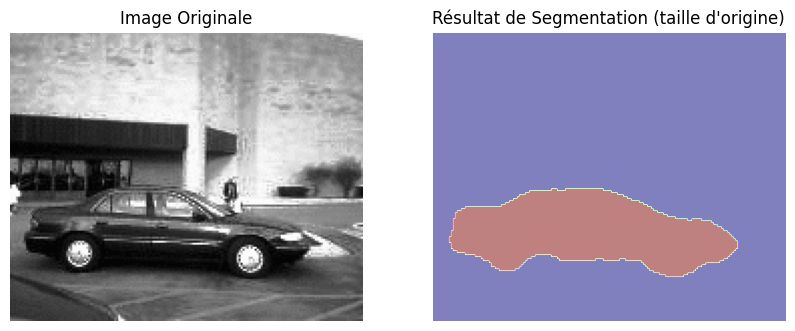

In [3]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

import zipfile
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from torchvision import models
import torch
from torchvision import transforms

# Charger le modèle FCN pré-entraîné
model = models.segmentation.fcn_resnet101(pretrained=True)
model.eval()  # Mode évaluation

# Charger et prétraiter l'image
image = cv2.imread('/content/drive/MyDrive/Computer vision/segmentation/CarData/TestImages_Scale/test-0.pgm')
original_size = (image.shape[1], image.shape[0])  # Taille originale de l'image
image_resized = cv2.resize(image, (640, 480))  # Redimensionner pour correspondre à la taille d'entrée du modèle
input_tensor = transforms.ToTensor()(image_resized).unsqueeze(0)  # Ajouter une dimension de lot (1,480,640,3)

# Effectuer la segmentation
with torch.no_grad():
    output = model(input_tensor)['out'][0]  # Sortie du modèle
output_predictions = output.argmax(0)  # Prédiction des classes pour chaque pixel

# Redimensionner le masque de segmentation pour correspondre à la taille d'origine
output_predictions_resized = cv2.resize(output_predictions.cpu().numpy(), original_size, interpolation=cv2.INTER_NEAREST)

# Visualiser le résultat
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Image Originale')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(output_predictions_resized, cmap='jet', alpha=0.5)
plt.title('Résultat de Segmentation (taille d\'origine)')
plt.axis('off')
plt.show()



# Exercice 8: U-Net pour la Segmentation d'Image

U-Net est un réseau de neurones convolutionnels couramment utilisé pour la segmentation d'images médicales. Il capture le contexte et maintient une localisation précise grâce à des connexions de saut.

## Étapes :
1. Charger le modèle U-Net.
2. Charger et prétraiter l'image d'entrée.
3. Effectuer l'inférence et visualiser les résultats.


In [ ]:
!pip install segmentation-models-pytorch

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 15.4 MB/s eta 0:00:00
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16424 sha256=aab5eedc66dfaa1540d70dcaa86a32aa38883c98894da54cf069c3099b357f6e
  Stored in directory: /root/.cache/pip/wheels/03/3f/e9/911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60944 sha256=2314278b8443469666ccc9c21706019026641d07e357322ef01f024b946b839f
  Stored in directory: /root/.cache/pip/wheels/35/cb/a5/8f534c60142835bfc889f9a482e4a67e0b817032d9c6883b64
Successfully built efficientnet-pytorch

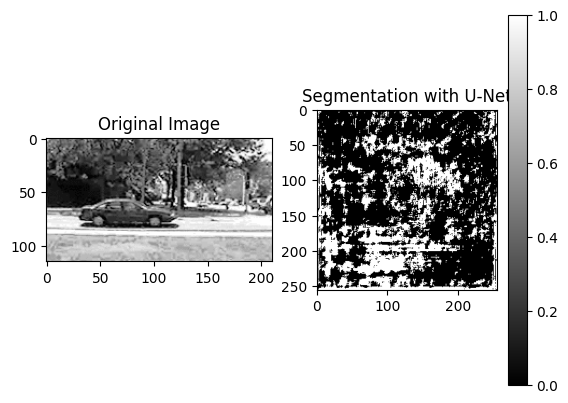

In [ ]:
import segmentation_models_pytorch as smp
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

# Load the pre-trained U-Net model
model = smp.Unet(encoder_name="resnet18", encoder_weights="imagenet", classes=1, activation="sigmoid")
model.eval()

# Load and preprocess the image
image = Image.open('/content/drive/MyDrive/Computer vision/segmentation/CarData/TestImages/test-0.pgm').convert('RGB')
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = transform(image).unsqueeze(0)

# Perform inference
with torch.no_grad():
    output = model(input_tensor)

# Convert the output to a binary mask
output_predictions = (output.squeeze() > 0.5).cpu().numpy()

# Display the results
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)

plt.subplot(1, 2, 2)
plt.title("Segmentation with U-Net")
plt.imshow(output_predictions, cmap='gray')
plt.colorbar()
plt.show()



# Exercice 9: Instance Segmentation avec Mask R-CNN

Mask R-CNN est une extension de Faster R-CNN qui ajoute une branche pour prédire les masques de segmentation pour chaque région d'intérêt.

## Étapes :
1. Charger le modèle Mask R-CNN pré-entraîné.
2. Charger et prétraiter l'image d'entrée.
3. Effectuer l'inférence et visualiser les résultats avec les masques et les boîtes englobantes.


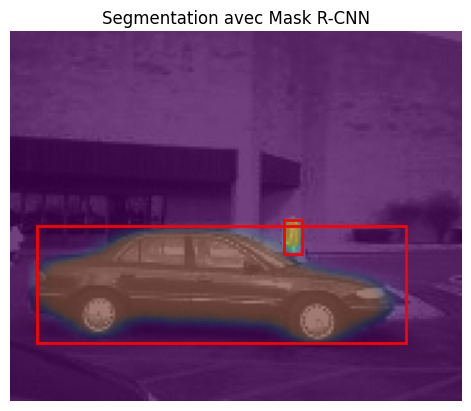

In [7]:

import torch
from torchvision import models
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as T

# Charger le modèle Mask R-CNN pré-entraîné
model = models.detection.maskrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Charger et prétraiter l'image
image = Image.open('/content/drive/MyDrive/Computer vision/segmentation/CarData/TestImages_Scale/test-0.pgm').convert('RGB')
transform = T.Compose([
    T.ToTensor(),
])
input_tensor = transform(image)

# Inférence
with torch.no_grad():
    predictions = model([input_tensor])

# Visualisation des résultats
plt.imshow(image)
ax = plt.gca()

# Dessiner les boîtes englobantes et les masques
for i in range(len(predictions[0]['boxes'])):
    box = predictions[0]['boxes'][i].numpy()
    score = predictions[0]['scores'][i].item()
    mask = predictions[0]['masks'][i, 0].mul(255).byte().numpy()

    if score > 0.5:  # Seuil de confiance
        ax.add_patch(plt.Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1], fill=False, edgecolor='red', linewidth=2))
        plt.imshow(mask, alpha=0.5)  # Superposer le masque

plt.title("Segmentation avec Mask R-CNN")
plt.axis('off')
plt.show()



# Exercice 10: Segmentation Panoptique avec Panoptic FPN

Le réseau Panoptic FPN est conçu pour la détection et la segmentation d'objets en utilisant des représentations multi-échelles.

## Étapes :
1. Charger le modèle Panoptic FPN pré-entraîné.
2. Charger et prétraiter l'image d'entrée.
3. Effectuer l'inférence et visualiser les résultats.


In [8]:

!pip install torch torchvision torchaudio
!pip install git+https://github.com/facebookresearch/detectron2.git



  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-j_04azc_
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-j_04azc_
  Resolved https://github.com/facebookresearch/detectron2.git to commit 9131ce0e5bc0c89904541bc0355d933ccd6acbfb
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.2/79.2 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 33.6 MB/s eta 0:00:00
  Created wheel for detectron2: filename=detectron2-0.6-cp310

In [1]:
import torch
from detectron2.config import get_cfg
from detectron2.engine import DefaultPredictor
from detectron2 import model_zoo
from detectron2.utils.visualizer import Visualizer
import cv2
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [3]:

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-PanopticSegmentation/panoptic_fpn_R_50_3x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-PanopticSegmentation/panoptic_fpn_R_50_3x.yaml")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
cfg.MODEL.DEVICE = "cuda" if torch.cuda.is_available() else "cpu"


predictor = DefaultPredictor(cfg)


model_final_c10459.pkl: 184MB [00:01, 131MB/s]                           


In [2]:
# Load COCO panoptic segmentation metadata
from detectron2.data import MetadataCatalog

# Access the metadata from COCO dataset
metadata = MetadataCatalog.get("coco_2017_val_panoptic")


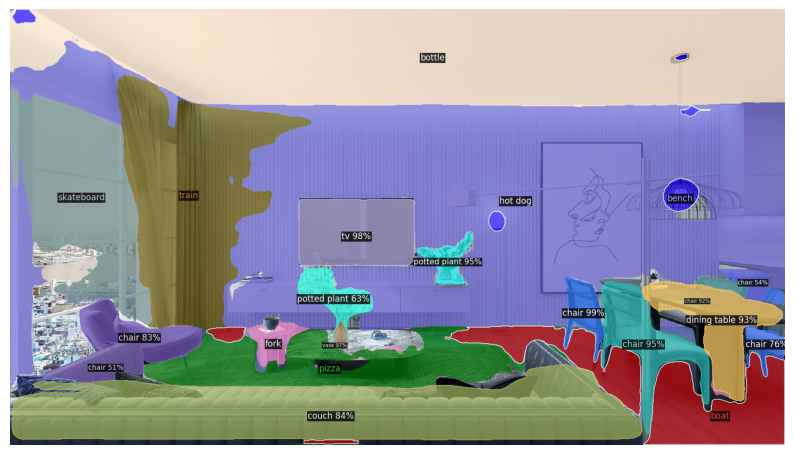

In [5]:
# Load and display the image
img_path = '/content/drive/MyDrive/Computer vision/Image1.png' # Replace with your image path
image = cv2.imread(img_path)
outputs = predictor(image)

# Visualize the segmentation output
v = Visualizer(image[:, :, ::-1], metadata=metadata, scale=1.2)
# Move the tensors to CPU before drawing
panoptic_seg, segments_info = outputs["panoptic_seg"]
panoptic_seg = panoptic_seg.cpu()
# Now, you can draw the panoptic segmentation predictions
v = v.draw_panoptic_seg_predictions(panoptic_seg, segments_info)
result = v.get_image()[:, :, ::-1]

# Display the result
plt.figure(figsize=(10,10))
plt.imshow(result)
plt.axis('off')
plt.show()

